In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\Amma\Documents\NareshIT\DataFiles\Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
cat=visa_df.select_dtypes(include='object').columns
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
# getting numerical columns
num=visa_df.select_dtypes(exclude='object').columns
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [5]:
# Reading the continent column
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [6]:
# Reading the case_status column
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

- So, there are a total of 25480 Applicants
- In that  25480 Applicants 17018 applicants got visa
- 8462 applicants did not get visa
- And sldo there are 16861 applicants are applied for visa from Asia
- We want to know how many applicants from asia got certified and how many applicants got denied

In [7]:
# step-1: select the continent data
# step-2: continent data==Asia  --> condition-1
# step-3: select the case_status data
# step-4: case status data=='Certified' --> condition-2
# step-5: con=con1 & con2
# step-6: apply main df on con and get the length

In [8]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con=con1 & con2
visa_df[con]
len(visa_df[con])

11012

In [9]:
# Calculating counts of continents/uniquely
visa_df['continent'].value_counts().unique

<bound method Series.unique of continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64>

In [10]:
# Retreiving the names of uniques continents as lables
lables=visa_df['continent'].unique()
lables

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [11]:
# Calculating how many people got certified from different continents

lables=visa_df['continent'].unique()

for i in lables:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con=con1 & con2
    visa_df[con]
    print(len(visa_df[con]))

11012
397
2037
2957
493
122


In [12]:
# Calculating how many people got certified and denied from different continents
# And appending the values to seperate lists

lables=visa_df['continent'].unique()
certified_count=[]
denied_count=[]
for i in lables:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    cert_con=con1 & con2
    den_con=con1 & con3
    visa_df[con]
    certified_count.append(len(visa_df[cert_con]))
    denied_count.append(len(visa_df[den_con]))

print(certified_count)
print(denied_count)

[11012, 397, 2037, 2957, 493, 122]
[5849, 154, 1255, 775, 359, 70]


In [13]:
# creating the DataFrame for above data

cols=sorted(visa_df['case_status'].unique())
print(cols)
df=pd.DataFrame(zip(certified_count,denied_count),
               columns=cols,index=lables)
df

['Certified', 'Denied']


,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


In [14]:
# short-cut for all above scenarios using 'cross-tab'

**CROSS-TAB**

In [15]:
# pd.crosstab(<index>,<columns>) # check with shift + tab
col1=visa_df['continent']
col2=visa_df['case_status']
r1=pd.crosstab(col1,col2)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

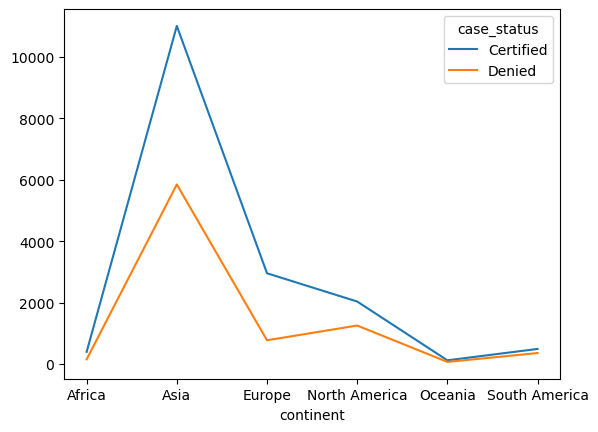

In [16]:
# Drawing the plot for above information/data
# By default it is line-graph
r1.plot()

<Axes: xlabel='continent'>

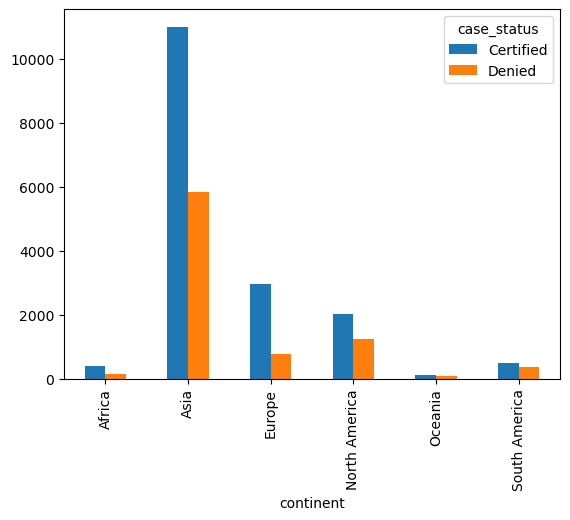

In [17]:
r1.plot(kind='bar')

In [18]:
# Working with multiple lines

**case_status - continent - education of employees**

In [19]:
# From asia 16k applicants applied for visa
#  From that 11k+ people got certified
#        In that 11k+ people, different education applicants are available
# We wanr those different education information

In [20]:
# pd.crosstab(<index>,<columns>)
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col2,col3]  # Here we can take the columns as per best views
r2=pd.crosstab(col1,cols) # Here we can take the column as per best vies
r2

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

<Axes: xlabel='continent'>

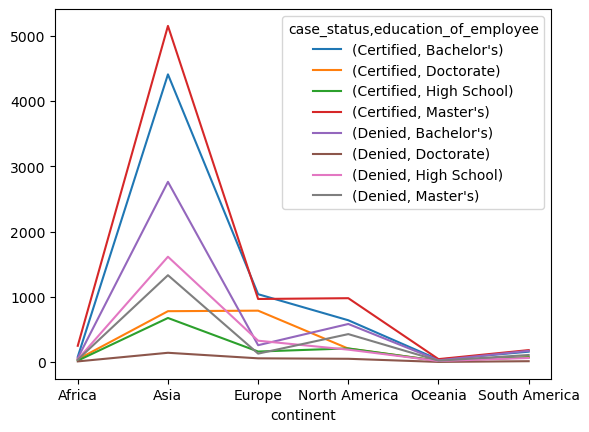

In [21]:
r2.plot()

<Axes: xlabel='continent'>

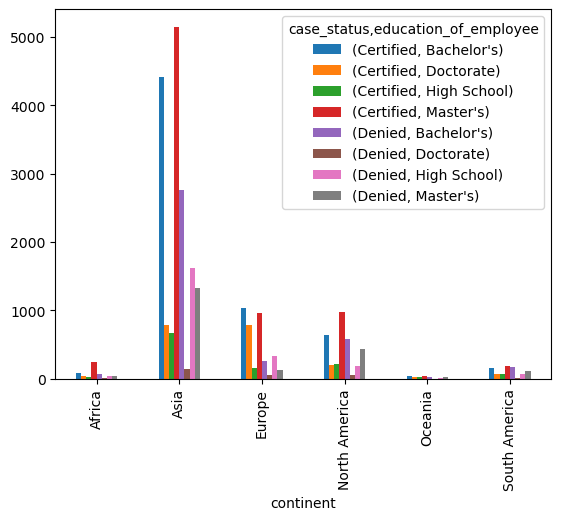

In [22]:
r2.plot(kind='bar')

**GROUP-BY in Pandas**

In [23]:
visa_df['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

In [24]:
# As wages are numerical values dont applu valu_counts here
# 25480 applicants are available
# Different applicants have different wages

visa_df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [25]:
list(visa_df.groupby('education_of_employee'))

[("Bachelor's",
           case_id      continent education_of_employee has_job_experience  \
  2         EZYV03           Asia            Bachelor's                  N   
  3         EZYV04           Asia            Bachelor's                  N   
  6         EZYV07           Asia            Bachelor's                  N   
  7         EZYV08  North America            Bachelor's                  Y   
  8         EZYV09           Asia            Bachelor's                  N   
  ...          ...            ...                   ...                ...   
  25466  EZYV25467         Europe            Bachelor's                  Y   
  25468  EZYV25469           Asia            Bachelor's                  N   
  25473  EZYV25474           Asia            Bachelor's                  Y   
  25475  EZYV25476           Asia            Bachelor's                  Y   
  25479  EZYV25480           Asia            Bachelor's                  Y   
  
        requires_job_training  no_of_employee

In [26]:
# grouping and counting
visa_df.groupby('education_of_employee').count()

,case_id,continent,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
education_of_employee,,,,,,,,,,,
Bachelor's,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234
Doctorate,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192
High School,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420
Master's,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634


In [27]:
# Calculating size of each group
# size is similar to value_counts
visa_df.groupby('education_of_employee').size()

education_of_employee
Bachelor's     10234
Doctorate       2192
High School     3420
Master's        9634
dtype: int64

In [28]:
# Selecting particulat column after group by
visa_df.groupby('education_of_employee')['prevailing_wage']

In [29]:
# Mean(Avg) wage of all 25480 observations education wise
visa_df['prevailing_wage'].mean()

np.float64(74455.81459209183)

In [30]:
visa_df[visa_df['education_of_employee']=="Bachelor's"]['prevailing_wage'].mean()

np.float64(73405.44373547)

In [31]:
# Average wage of all groups
# Instead of using one by one step we can do all at a single step

visa_df.groupby('education_of_employee')['prevailing_wage'].mean()

education_of_employee
Bachelor's     73405.443735
Doctorate      64561.076657
High School    71582.147756
Master's       78843.057843
Name: prevailing_wage, dtype: float64

In [32]:
# Retreiving the Denied data continent wise using group by

con=visa_df['case_status']=='Denied'
new_df=visa_df[con]
new_df.groupby('continent').size()

continent
Africa            154
Asia             5849
Europe            775
North America    1255
Oceania            70
South America     359
dtype: int64

In [33]:
# Retreiving the Certified data continent wise using group by

con=visa_df['case_status']=='Certified'
new_df=visa_df[con]
new_df.groupby('continent').size()

continent
Africa             397
Asia             11012
Europe            2957
North America     2037
Oceania            122
South America      493
dtype: int64

In [34]:
# Finding min salary of Asia people

con=visa_df['continent']=='Asia'
new_df=visa_df[con]
new_df['prevailing_wage'].min()

3.3188

In [35]:
# Finding min wage of all continents using group by
visa_df.groupby('continent')['prevailing_wage'].min()

continent
Africa           32.9286
Asia              3.3188
Europe            9.1753
North America     2.1367
Oceania          24.4888
South America     3.0031
Name: prevailing_wage, dtype: float64

**10-12-2025**

- We have seen two variables called **continent and case_status**
- We have also seen three variables called **continent, case_status and education of employee**
- We also did the similar analysis using group by
- Only categorical column analysis completed
- Only Numerrical column analysis completed
- Also Bi-Varuant, Multi-Variant Analysis also completed
- Now we need to perform two numerical columns Analysis
    - This will give relation between two columns which are numerical in nature
    - So we can perform **correlation matrix** to get the relationship
    - Also we need to perform **scatter plots** to visualize the relation

In [36]:
# categorical columns
cat=visa_df.select_dtypes(include='object').columns
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [37]:
# getting numerical columns
num=visa_df.select_dtypes(exclude='object').columns
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**plt.scatter**

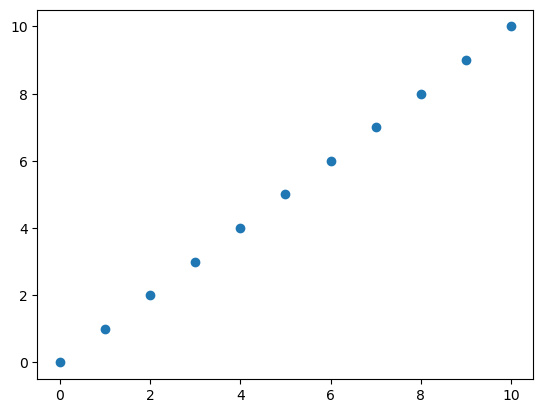

In [38]:
x=range(0,11)
y=range(0,11)
plt.scatter(x,y) # gives in dots

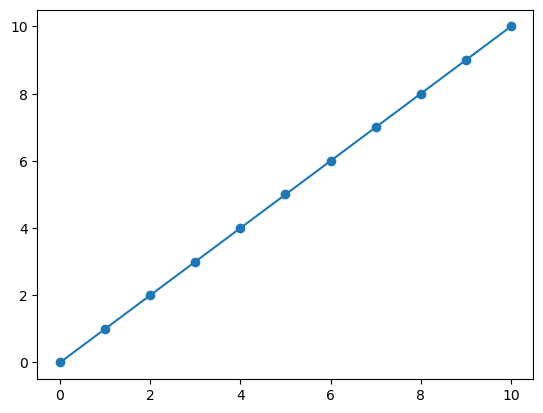

In [48]:
x=range(0,11)
y=range(0,11)
plt.scatter(x,y)
plt.plot(x,y) # gives in line

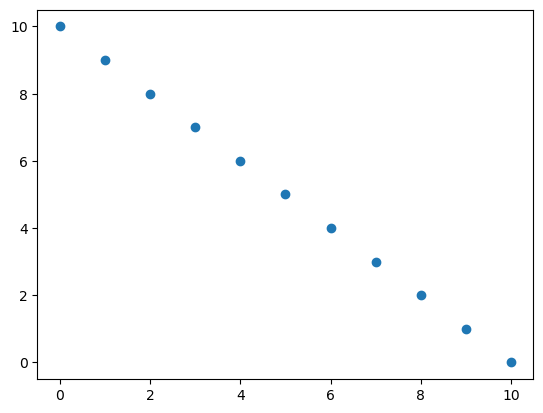

In [41]:
x=range(0,11) # 0 t0 10
y=range(10,-1,-1) # 10 to -1+1=0
plt.scatter(x,y) # gives in dots

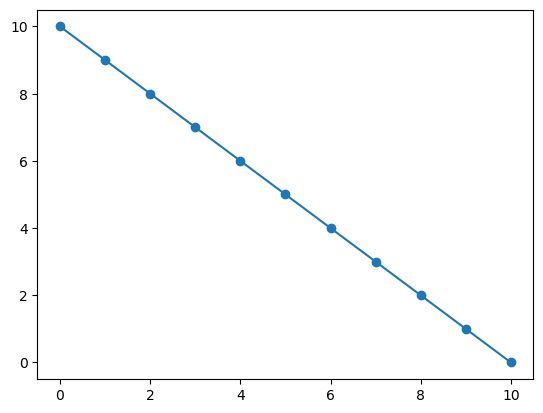

In [47]:
x=range(0,11) # 0 t0 10
y=range(10,-1,-1) # 10 to -1+1=0
plt.scatter(x,y)
plt.plot(x,y) 

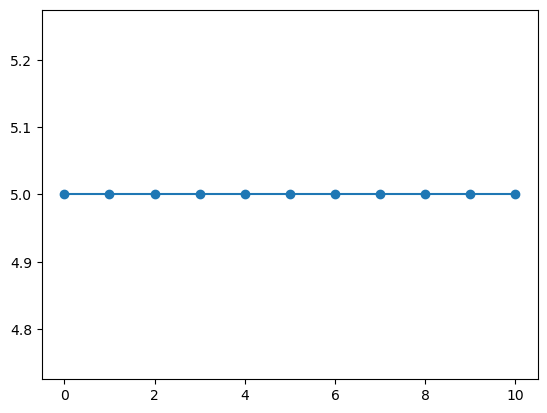

In [45]:
# gives both dots and line
x=range(0,11) # 0 t0 10
y=[5 for i in range(0,11)]
plt.scatter(x,y) 
plt.plot(x,y)

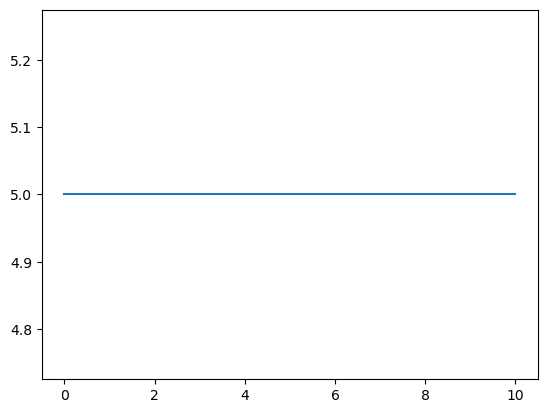

In [44]:
x=range(0,11) # 0 t0 10
y=[5 for i in range(0,11)]
plt.plot(x,y) # gives only in line

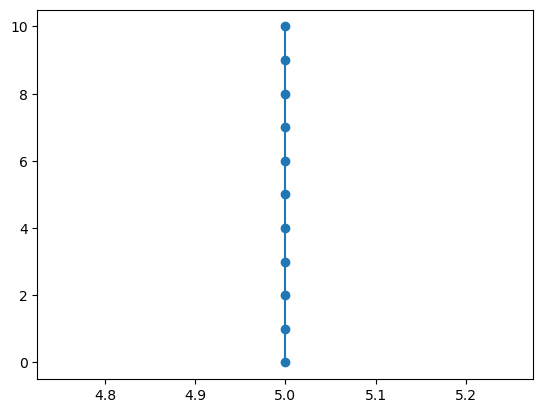

In [46]:
# gives both dots and line
x=[5 for i in range(0,11)]
y=range(0,11) 
plt.scatter(x,y) 
plt.plot(x,y)

In [49]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [50]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [51]:
visa_df.corr()
# ValueError: could not convert string to float: 'EZYV01'

ValueError: could not convert string to float: 'EZYV01'

In [52]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


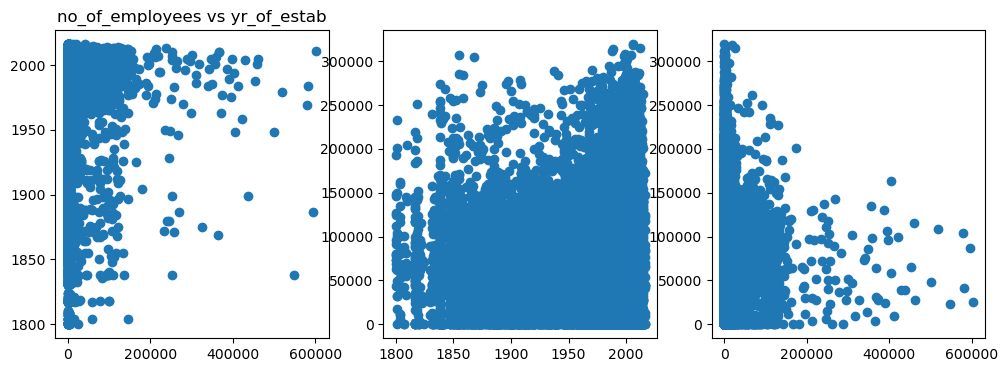

In [62]:
col1=visa_df['no_of_employees'] # reading employees
col2=visa_df['yr_of_estab'] # reading yr_of_estab
col3=visa_df['prevailing_wage'] # reading prevailing_wage
plt.figure(figsize=(12,4))
plt.subplot(1,3,1).scatter(col1,col2)
plt.title('no_of_employees vs yr_of_estab')
plt.subplot(1,3,2).scatter(col2,col3)
plt.subplot(1,3,3).scatter(col1,col3)

**winequality_red Dataset**

In [60]:
# reading winequality_red dataset
wine_df=pd.read_csv(r"C:\Users\Amma\Documents\NareshIT\DataFiles\winequality_red.csv")
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [63]:
cat=wine_df.select_dtypes(include='object').columns
cat

Index([], dtype='object')

In [65]:
num=wine_df.select_dtypes(exclude='object').columns
num

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [66]:
wine_df.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


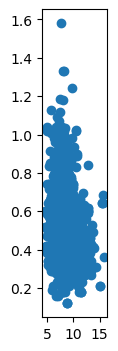

In [74]:
col1=wine_df['fixed acidity'] 
col2=wine_df['volatile acidity'] 
col3=wine_df['citric acid'] 
col4=wine_df['residual sugar'] 
col5=wine_df['chlorides'] 
col6=wine_df['free sulfur dioxide'] 
col7=wine_df['total sulfur dioxide'] 
col8=wine_df['density'] 
col9=wine_df['pH'] 
col10=wine_df['sulphates'] 
col11=wine_df['alcohol'] 
col12=wine_df['quality'] 

plt.figure(figsize=(12,4))
# plt.subplot(1,3,1).scatter(col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12)
plt.subplot(1,12,1).scatter(col1,col2)

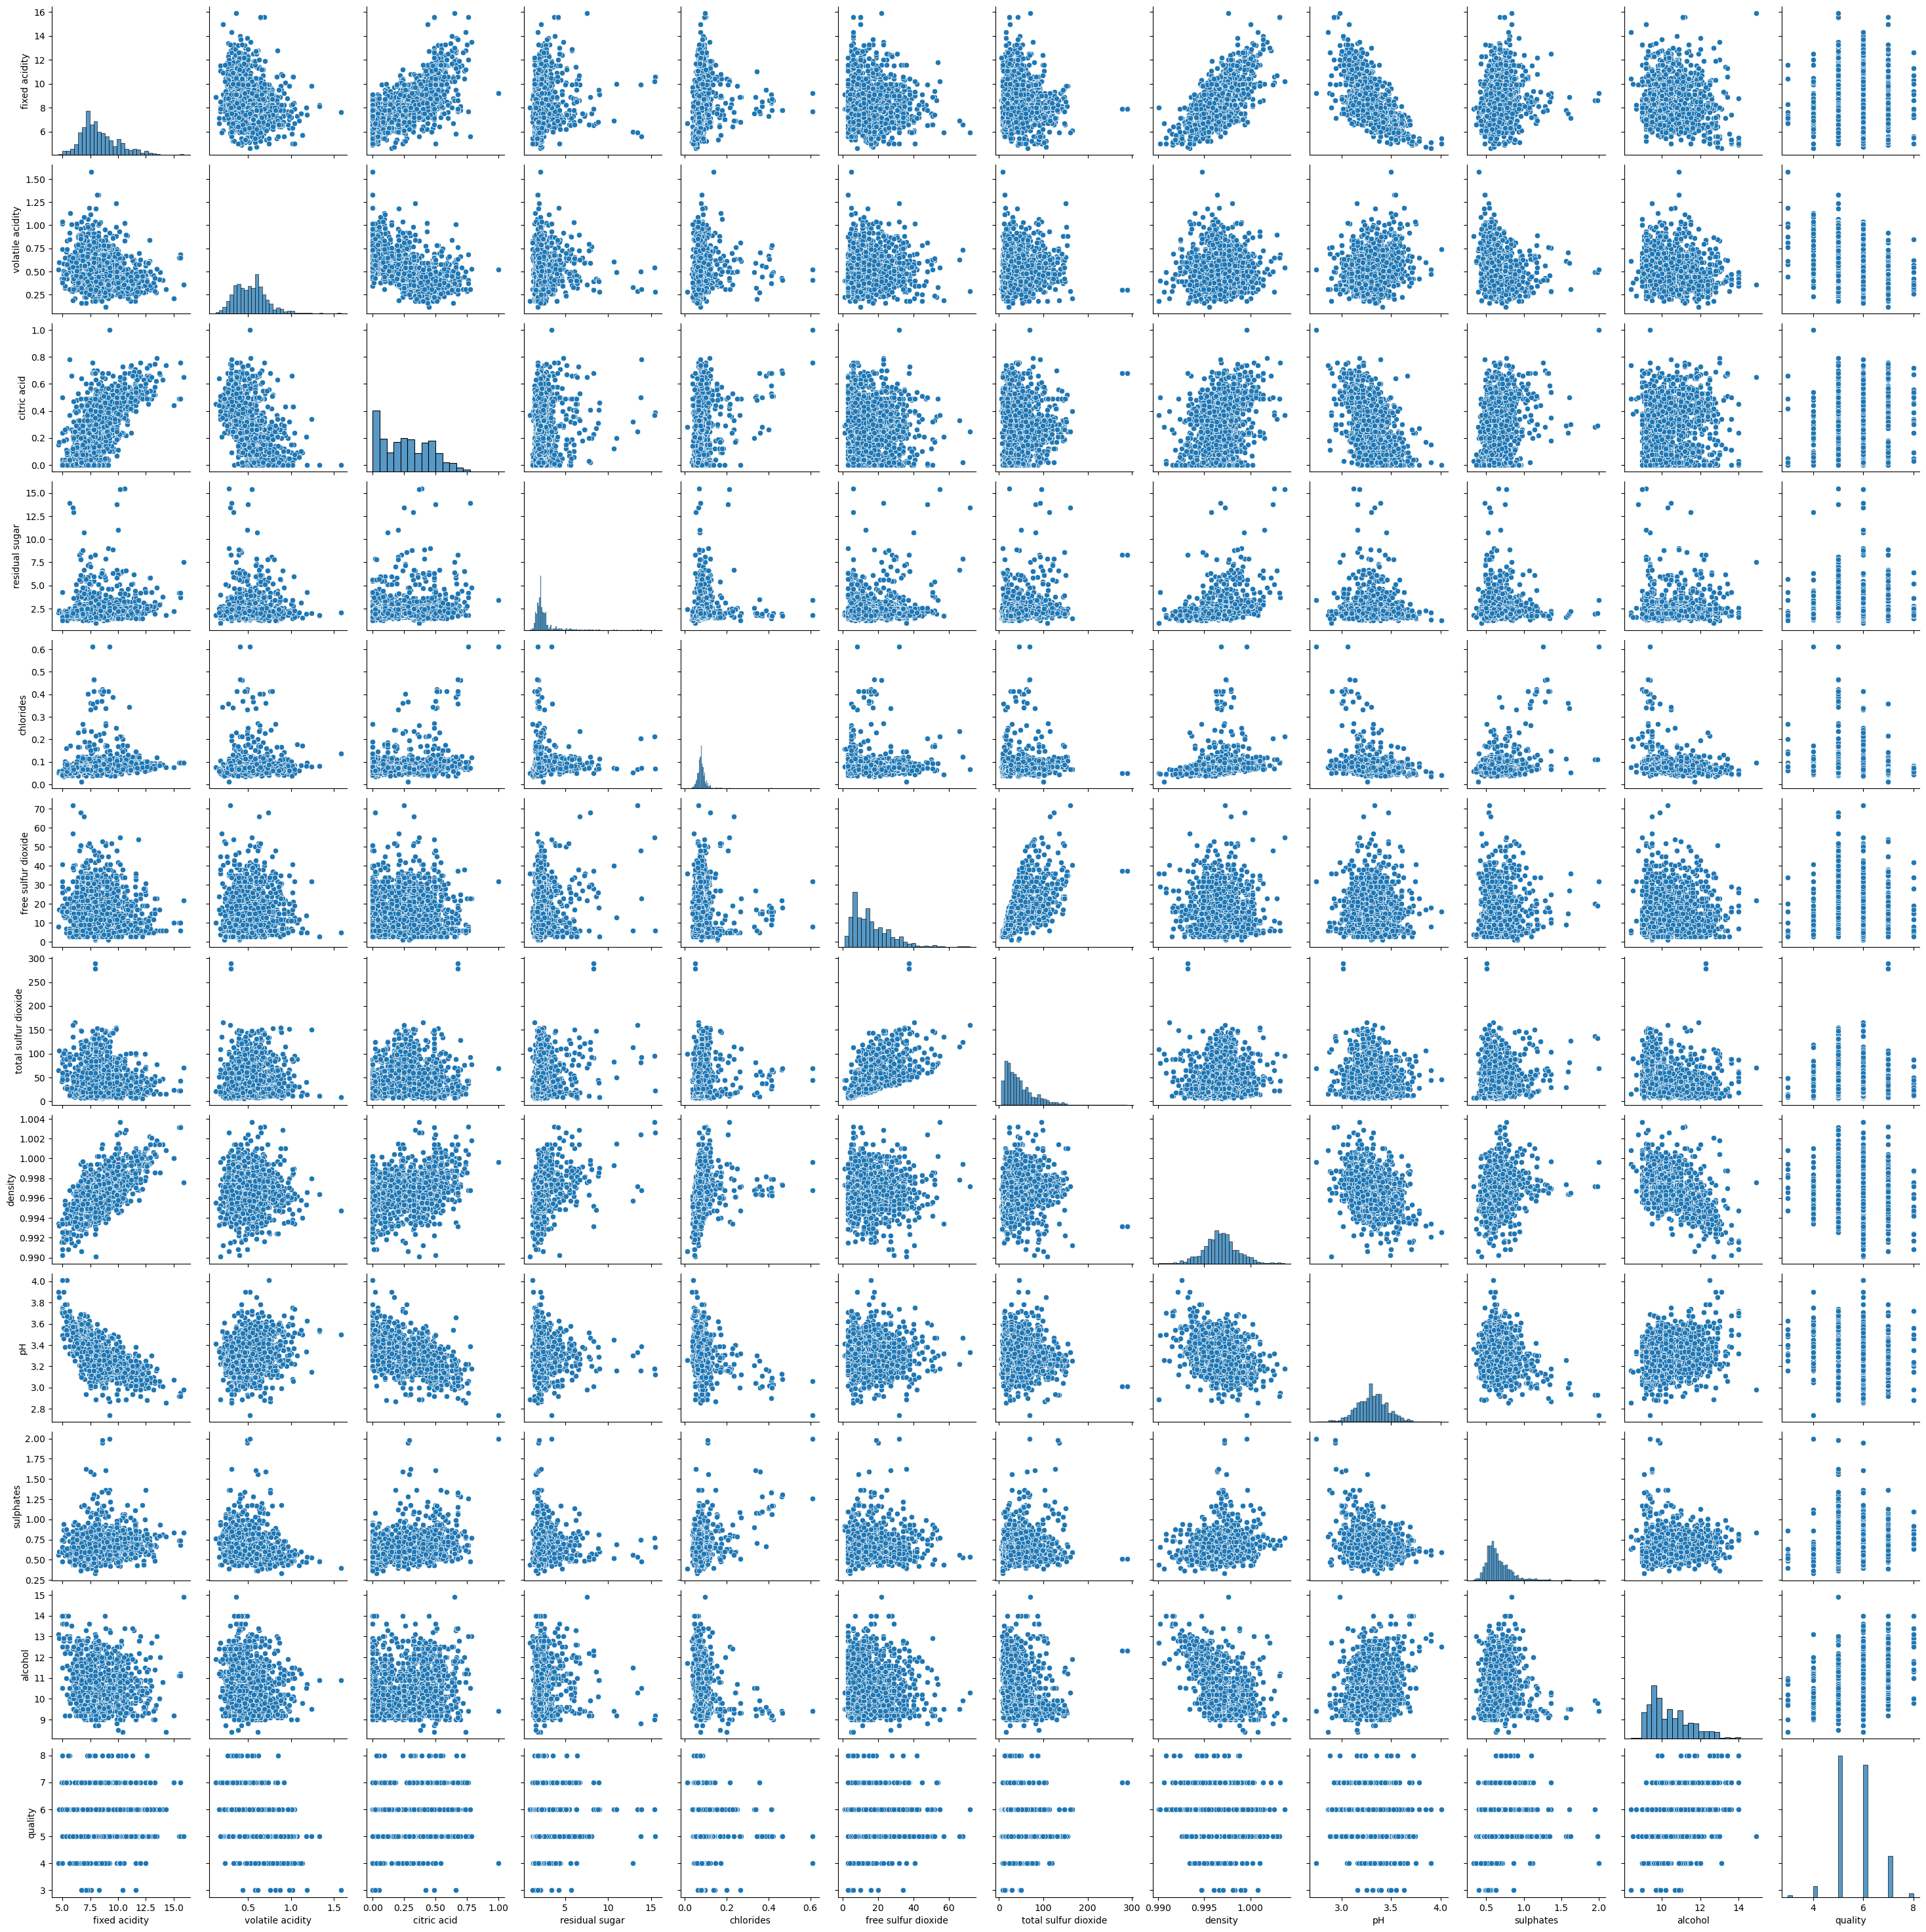

In [75]:
# we can get all relations ata aplace by using pairplot
sns.pairplot(wine_df)

**Heat Map**

- Any matrix values we can visualize using a heat-map
- Heat-map will provide colors for different values
- Heat map also provides colors bar which indicates the color and its value
- For example, ythe values ranges from 0.8 to 1 will be displayed in blue color
- So we need not to check values and when we see blue color we can sense that the blue color means highest values i.e. 0.8 to 1
- Heat-Map is available in **SEA-BORN**

<Axes: >

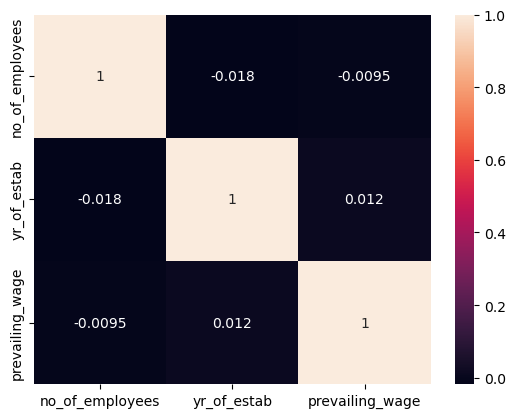

In [78]:
# for visa_df data
visa_corr=visa_df.corr(numeric_only=True)
sns.heatmap(visa_corr,annot=True)

<Axes: >

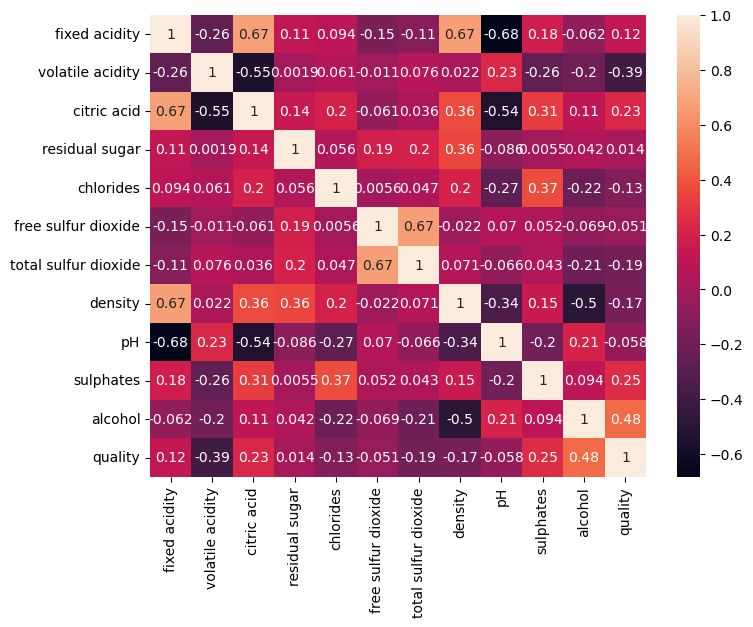

In [80]:
# for wine_df data
wine_data_corr=wine_df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(wine_data_corr,annot=True)

In [81]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

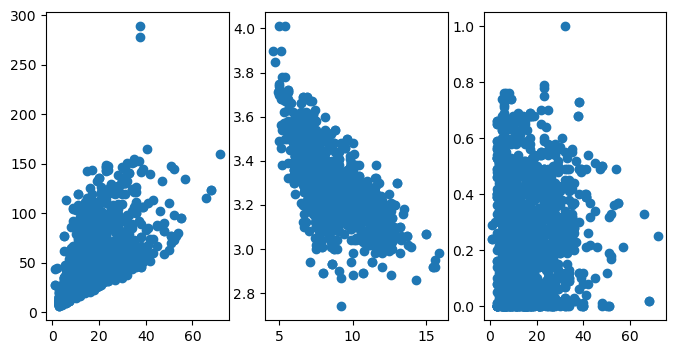

In [83]:
col1=wine_df['free sulfur dioxide']
col2=wine_df['total sulfur dioxide']
col3=wine_df['fixed acidity']
col4=wine_df['pH']
col5=wine_df['citric acid']
plt.figure(figsize=(8,4))
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col3,col4)
plt.subplot(1,3,3).scatter(col1,col5)